# Análise de Desempenho em Matemática e Ciências da Natureza no ENEM 2019

Autor: Lucas Silveira

Data: 25/10/2020

## Introdução

O [Pisa](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/pisa) (Programme for International Student Assessment) é uma metodologia internacional que avalia o nível educacional de jovens de 15 anos por meio de provas de leitura, matemática e ciências.

Na última avaliação, ocorrida em 2018, o Brasil mostrou uma piora no desempenho de matemática e ciências, mostrando que [dois terços dos brasileiros sabem menos que o básico de matemática](https://g1.globo.com/educacao/noticia/2019/12/03/brasil-cai-em-ranking-mundial-de-educacao-em-matematica-e-ciencias-e-fica-estagnado-em-leitura.ghtml).

## Análise

Usando os dados do ENEM 2019 (Exame Nacional do Ensino Médio) dos participantes do estado de São Paulo, esse artigo tentará traçar um perfil dos estudantes em relação as notas das provas de matemática e ciências da natureza, para verificar os resultados do PISA e propor futuras discussões.

In [47]:
import pandas as pd

estado = "sp"
uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/{estado}.csv.zip?raw=true"
arquivo = f'{estado}.csv.zip'
!wget -O $arquivo $uri

dados = pd.read_csv(arquivo, sep=';')
dados.columns = dados.columns.str.replace(' ', '')
dados["Q025"] = dados["Q025"].str.strip()
#dados.head()

--2020-10-26 02:25:30--  https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/sp.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip [following]
--2020-10-26 02:25:30--  https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip [following]
--2020-10-26 02:25:30--  https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

Como o PISA é realizado com alunos que estão estudando, vamos considerar aqui apenas os participantes que fizeream o ENEM 2019 e estavam estudando regularmente (exceto treineiros) e ainda que não zeraram em ambas as provas de Matemática e Ciências da Natureza (pois queremos avaliar o desempenho dos alunos, assim como o PISA).

In [48]:
provas = ["NU_NOTA_CN","NU_NOTA_MT"]
qse = ["Q001", "Q002", "Q003", "Q004", "Q005", "Q006", "Q009", "Q019", "Q021", "Q022", "Q024", "Q025"]

# filtros:
# * obter apenas participantes que tiveram nota maior q zero nas duas provas (quero avaliar desempenho)
# * obter somente participantes que nao sao treineiros
# * somente ensino regular
dados_provas_qse = dados.query("IN_TREINEIRO == 0 & TP_ENSINO == 1")[provas + qse].dropna().query("NU_NOTA_CN > 0 & NU_NOTA_MT > 0")

categories = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J' : 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19}
cat_cols = ["Q001", "Q002", "Q003", "Q004", "Q006", "Q009", "Q019", "Q021", "Q022", "Q024", "Q025"]

dados_provas_qse[cat_cols] = dados_provas_qse[cat_cols].applymap(categories.get)
#dados_provas_qse

Se calcularmos uma média geral das notas das provas, temos que a nota média de Ciências da Natureza é de aproximadamente 488.3 e a média da prova de Matemática é de 541. 

In [49]:
medias = pd.DataFrame(dados_provas_qse[provas].mean())
medias.reset_index(inplace=True)
medias = medias.drop(axis=1, columns=["index"])
medias["Provas"] = ["Ciências da Natureza", "Matemática"]
medias.columns = ["Nota Média", "Prova"]
medias = medias.reindex(columns=["Prova", "Nota Média"])
medias.round(1)

,Prova,Nota Média
0,Ciências da Natureza,488.3
1,Matemática,541.0


Para tentar entender melhor qual o perfil desses estudantes, usaremos as respostas do questionário socio-economico que foi respondido pelos estudantes durante o ENEM.

Outros estudos já indicaram uma correlação entre a renda familiar e o desempenho escolar, [expondo desigualdades entre os estudantes](https://www.nexojornal.com.br/academico/2020/05/14/Como-o-Enem-exp%C3%B5e-desigualdades-na-educa%C3%A7%C3%A3o-brasileira). Vamos verificar como isso se mostra para as provas de Matemática e Ciências da Natureza.

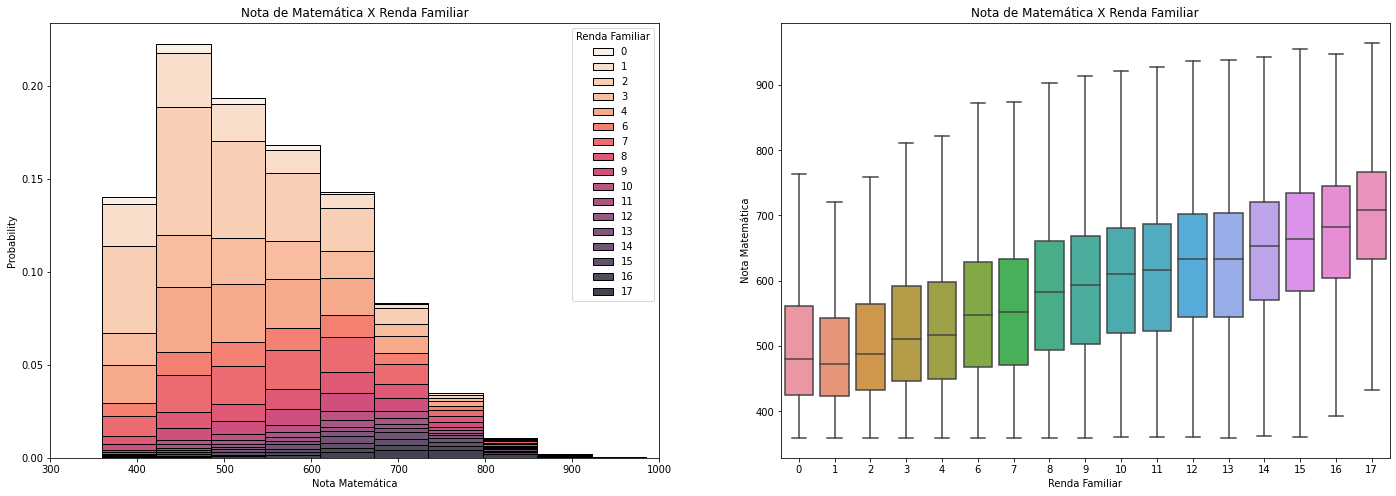

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

prova = "NU_NOTA_MT"
questao_qse = "Q006"

dados_grafico = dados_provas_qse[[prova, questao_qse]]
dados_grafico.columns = ["Nota Matemática", "Renda Familiar"]

fig, ax=plt.subplots(1,2, figsize=(24,8))
sns.histplot(dados_grafico, x = "Nota Matemática", hue="Renda Familiar", kde=False, bins=10, ax=ax[0], palette="rocket_r", multiple="stack", stat="probability")
sns.boxplot(data = dados_grafico, x = "Renda Familiar", y = "Nota Matemática", ax=ax[1], showfliers = False)
ax[0].set_title('Nota de Matemática X Renda Familiar')
ax[0].set_xlim([300, 1000])
ax[1].set_title('Nota de Matemática X Renda Familiar')
fig.show()

No primeiro gráfico, quanto mais escuro o tom, maior a renda familiar. Assim, percebemos que conforme as notas vão aumentando, embora um número menor de estudantes tenham tirado notas mais altas, esses estudantes possuem cada vez mais rendas familiares maiores.

No segundo gráfico (boxplot), as linhas intermediárias indicam as notas médias de matemática em cada faixa de renda familiar e assim podemos ver de outra forma como a renda parece influenciar na nota.

O mesmo comportamento ocorre para as notas da prova de Ciências da Natureza.

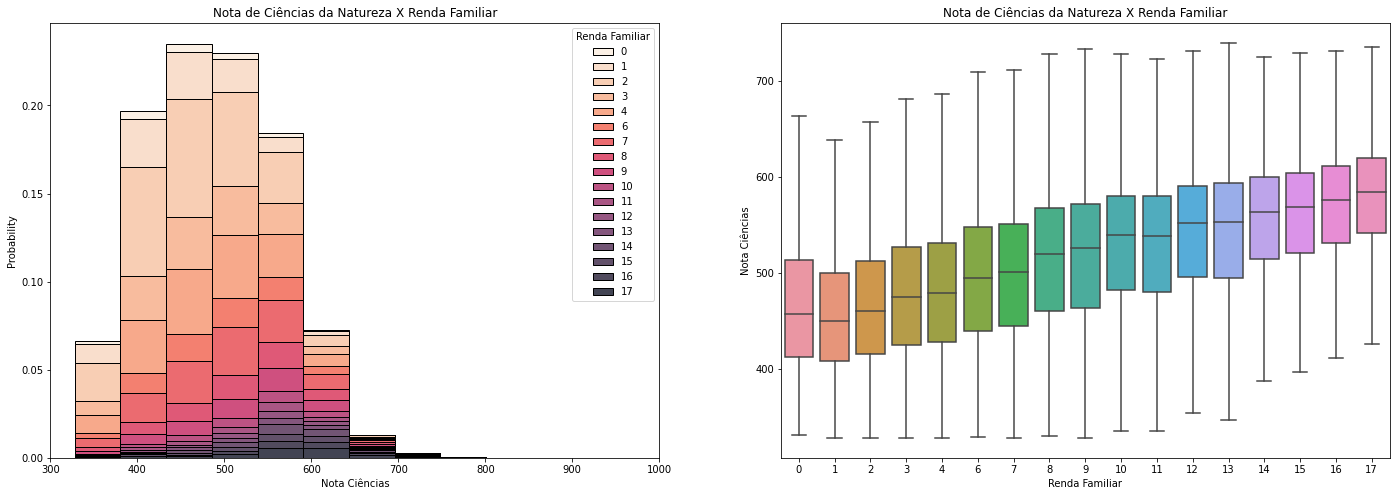

In [46]:
prova = "NU_NOTA_CN"
questao_qse = "Q006"

dados_grafico = dados_provas_qse[[prova, questao_qse]]
dados_grafico.columns = ["Nota Ciências", "Renda Familiar"]

fig, ax=plt.subplots(1,2, figsize=(24,8))
sns.histplot(dados_grafico, x = "Nota Ciências", hue="Renda Familiar", kde=False, bins=10, ax=ax[0], palette="rocket_r", multiple="stack", stat="probability")
sns.boxplot(data = dados_grafico, x = "Renda Familiar", y = "Nota Ciências", ax=ax[1], showfliers = False)
ax[0].set_title('Nota de Ciências da Natureza X Renda Familiar')
ax[0].set_xlim([300, 1000])
ax[1].set_title('Nota de Ciências da Natureza X Renda Familiar')
fig.show()

Mas de que forma que uma renda familiar mais alta poderia influenciar nesses resultados? 

Vamos verificar a evolução das notas para os estudantes em relação a possuir computador em casa e se têm acesso à internet.

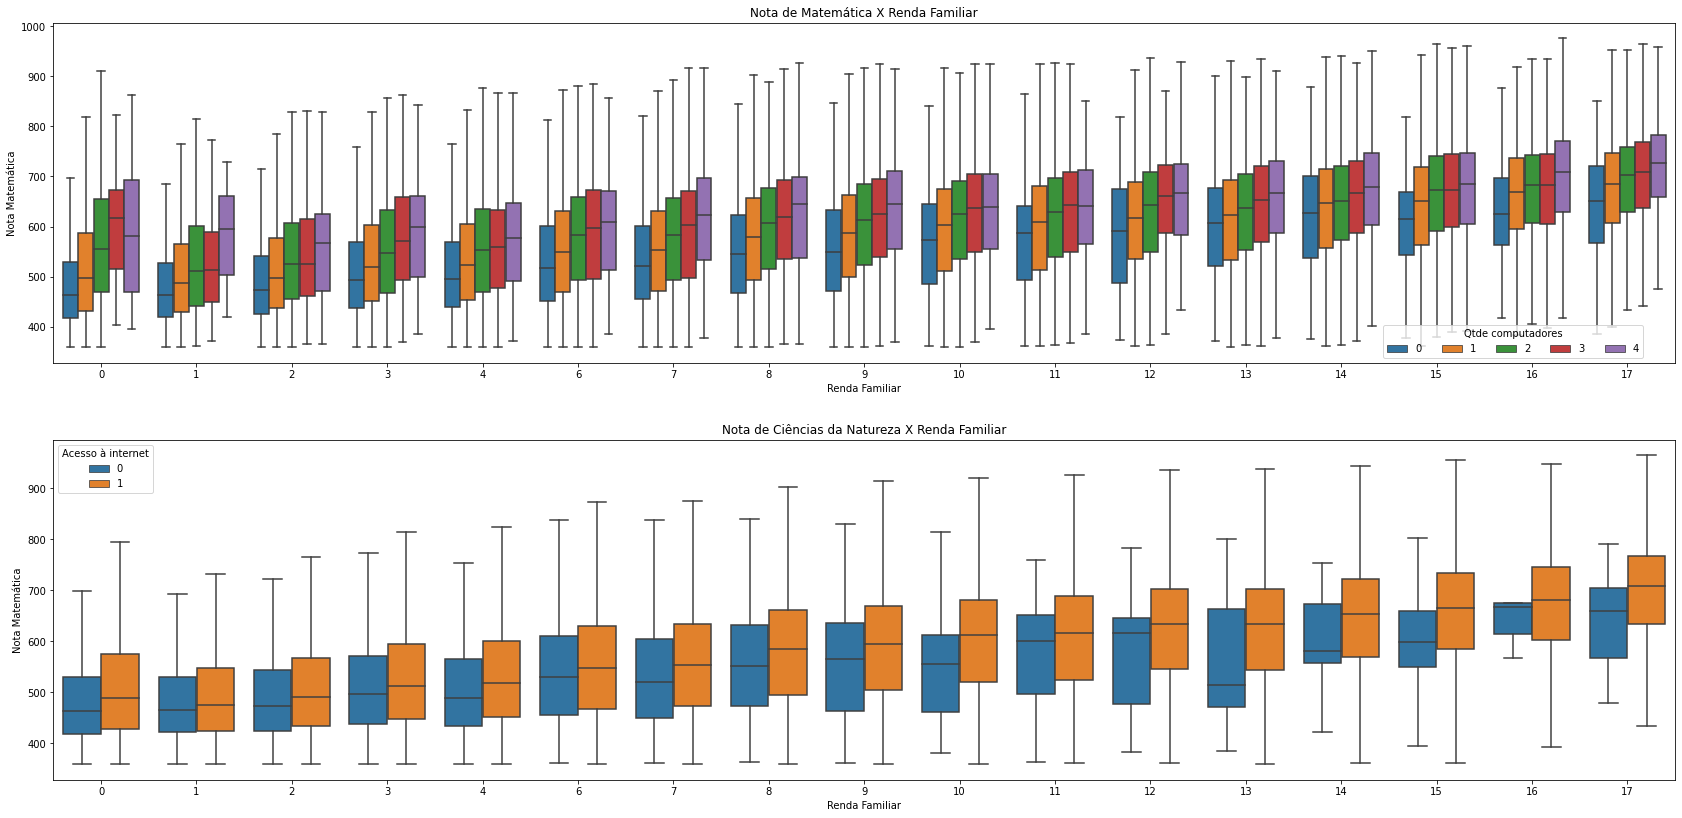

In [79]:
prova = "NU_NOTA_MT"
questao_qse = "Q006"

dados_grafico = dados_provas_qse[[prova, questao_qse, "Q025", "Q024"]]
dados_grafico.columns = ["Nota Matemática", "Renda Familiar", "Acesso à internet", "Qtde computadores"]

fig, ax=plt.subplots(2,1, figsize=(24,12))
sns.boxplot(data = dados_grafico, x="Renda Familiar", y="Nota Matemática", hue="Qtde computadores", ax=ax[0], showfliers = False)
sns.boxplot(data = dados_grafico, x="Renda Familiar", y="Nota Matemática", hue="Acesso à internet", ax=ax[1], showfliers = False)
ax[0].set_title('Nota de Matemática X Renda Familiar')
ax[1].set_title('Nota de Ciências da Natureza X Renda Familiar')
fig.tight_layout(pad=3.0)
ax[0].legend(title="Qtde computadores", loc="lower center", ncol=5, bbox_to_anchor=(.900, 0))
fig.show()

Podemos ver que a quantidade de computadores, acesso a internet e a renda familiar tem uma correlação com a nota de matemática, pois ela vai crescendo conform cresce a renda.

## Conclusões e Discussão

Infelizmente, os dados tendem a expor realmente a realidade brasileira, onde estudantes de baixa renda tendem a ter notas menores se não tiverem computador com acesso à internet.

Isso pode indicar que ter um computador com acesso à internet tem um impacto direto no desempenho dos estudantes. Essa correlação requer maior investigação, porém ela pode indicar um possível plano de políticas publicas para a educação, investigando por exemplo de que forma os alunos que possuem computador com internet utilizam esses recursos para estudar e tirar melhores notas.

Isso poderia mostrar um caminho para tentar diminuir a desigualdade e alcançar melhor desempenho no Pisa.